In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from importing_data import Import_data as imp
from my_hierarchy import my_HierarchicalClustering,plot_all_linkage_methods
from misc import plot_dendro
from em import my_GaussianMixtureEM
from dbscan import my_dbscan
from metrics import Metrics as metrics
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN, AgglomerativeClustering


###  Importing and Plotting datasets

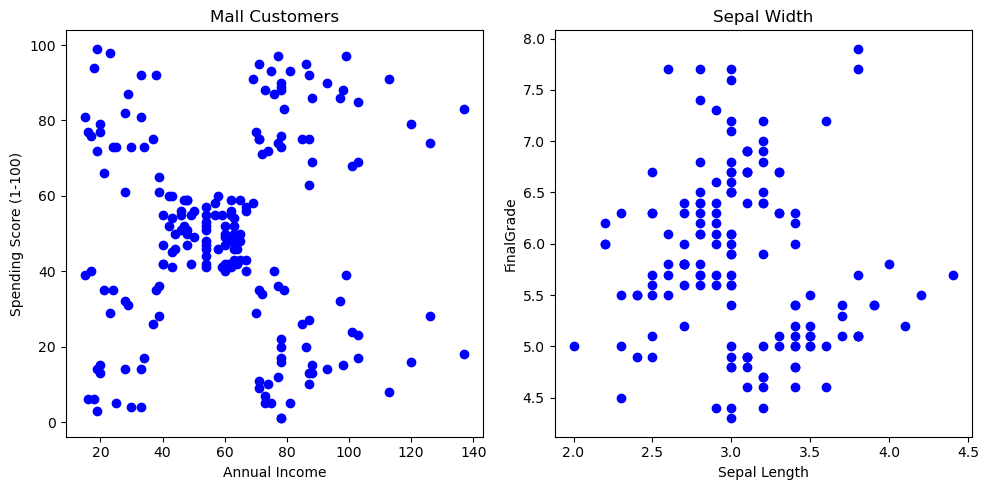

In [16]:
df1, df2 = imp.both()

### The cluster type of the first dataset is cluster connected with jumpers. The second seems to be made up of overlapping clusters.

#### Checking the optimum number of clusters for each dataset using the elbow method.

c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

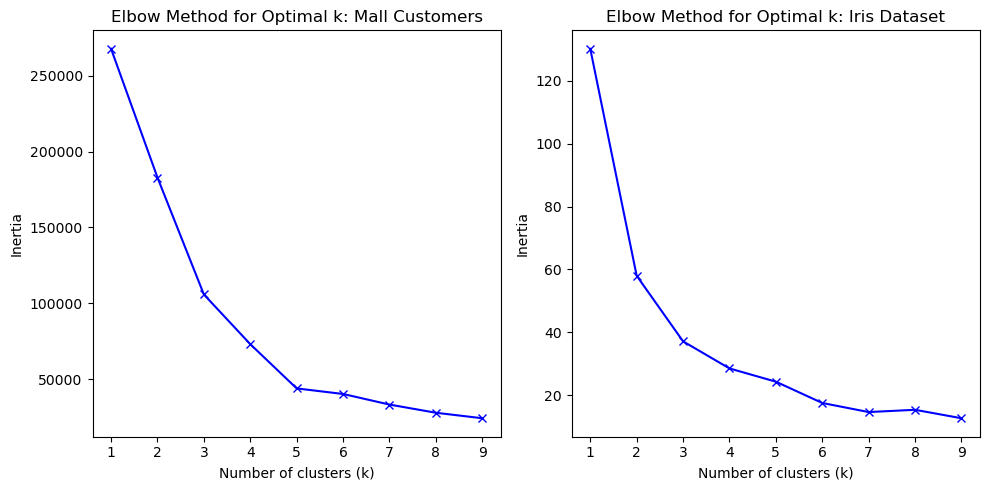

In [17]:
imp.plot_elbow_method(df1,df2,'Mall Customers', 'Iris Dataset')

The optimum number of clusters for the Mall Customers dataset is 5 or 6. As for the Iris Dataset 6 seems to be the best number of clusters.

Hierarchical Clustering of Mall Customers


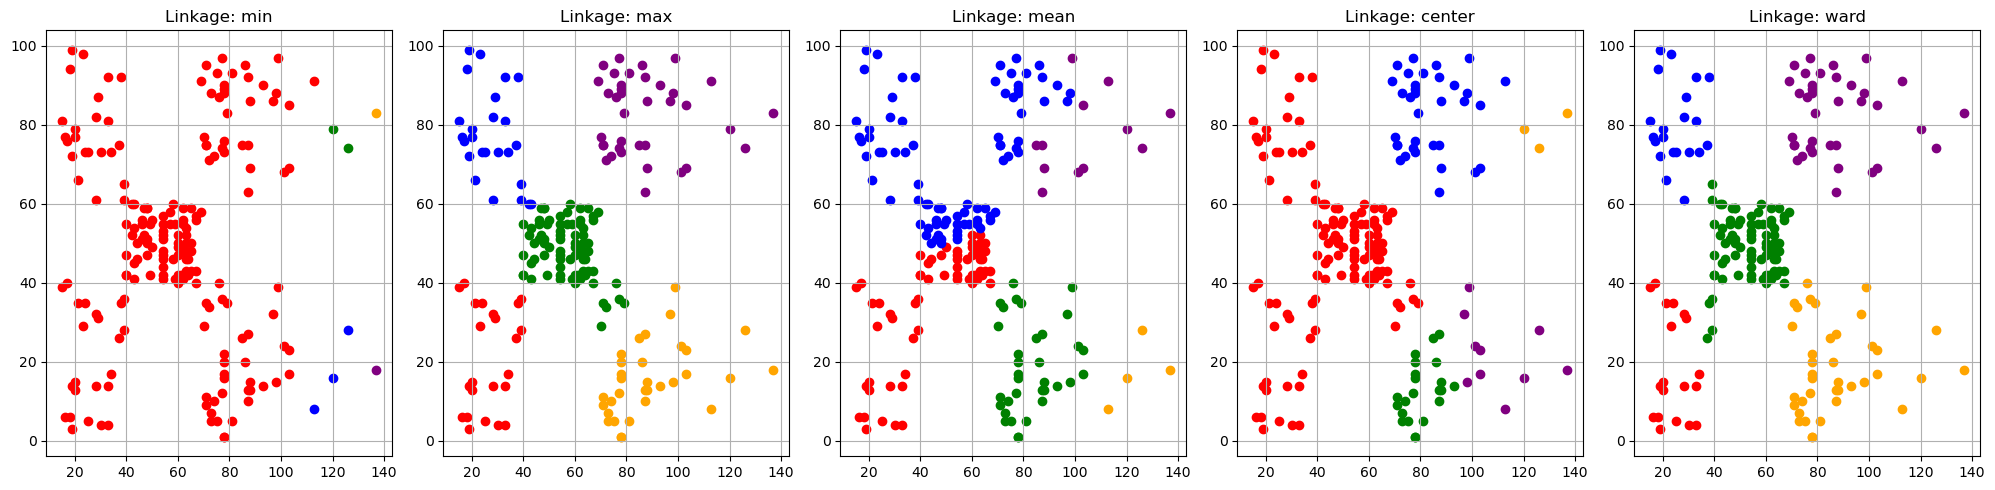

Hierarchical Clustering of Iris


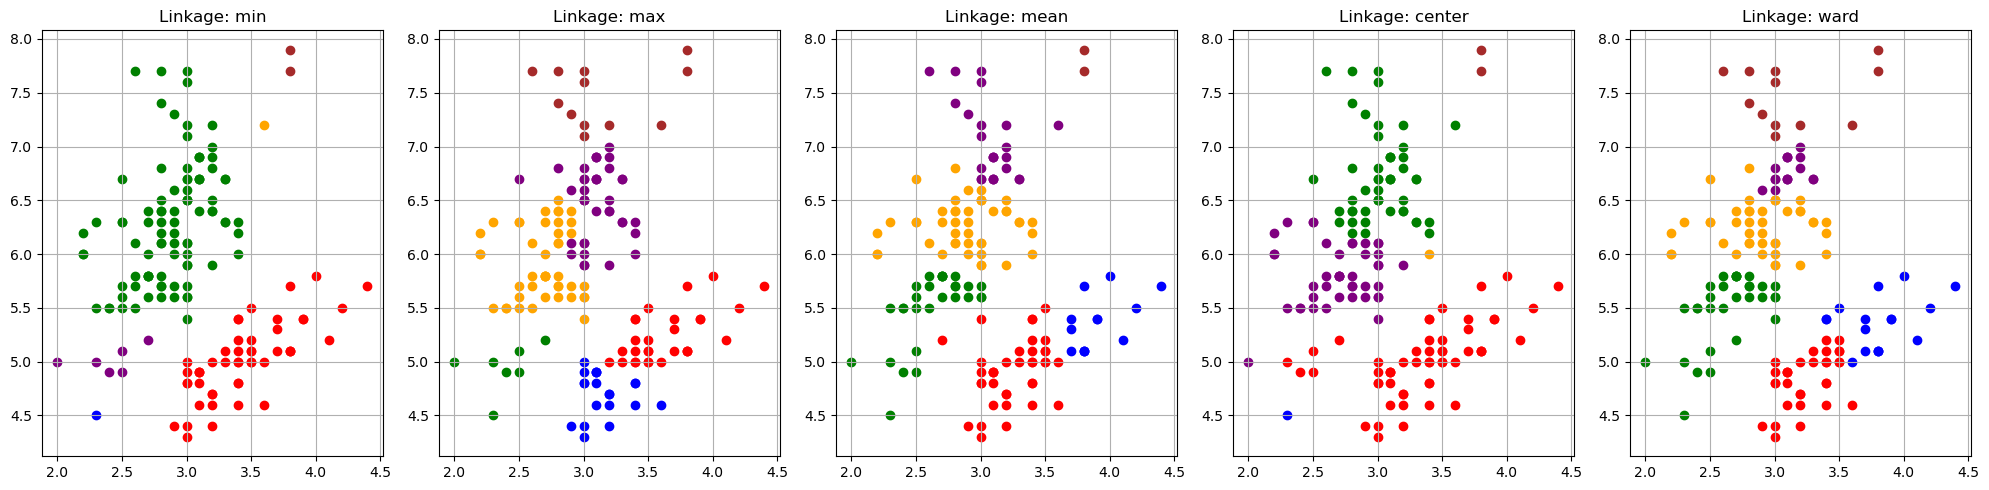

In [18]:
print('Hierarchical Clustering of Mall Customers')
h_labels_df1 = plot_all_linkage_methods(df1.values,5)
print('Hierarchical Clustering of Iris')
h_labels_df2 = plot_all_linkage_methods(df2.values,6)


Plotting dendrograms

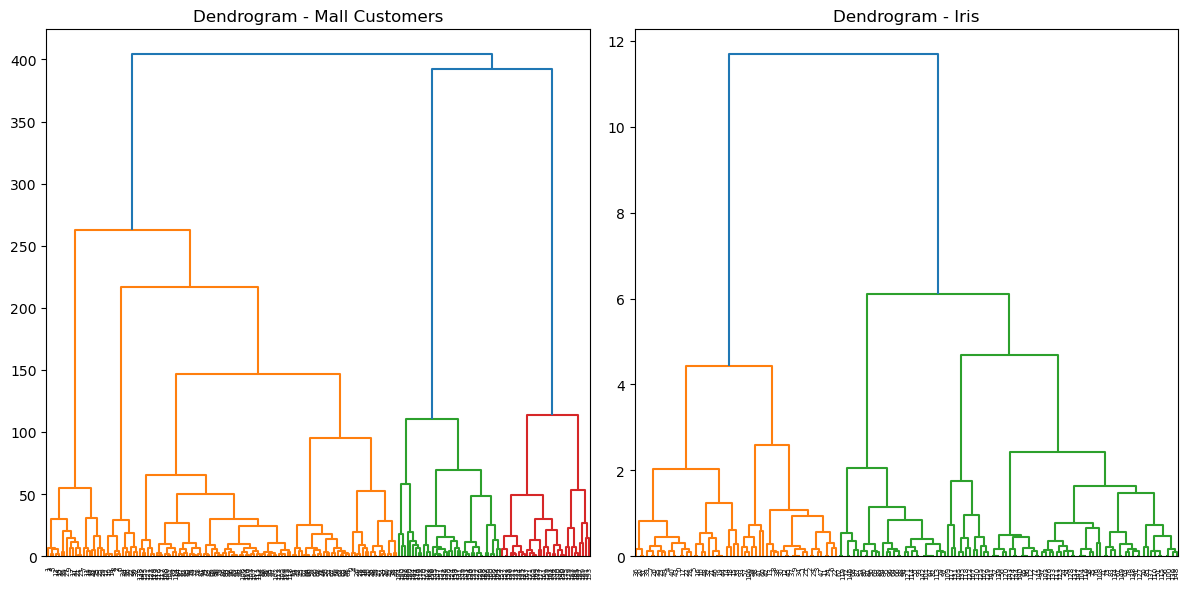

In [19]:
plot_dendro(df1,df2)

## EM

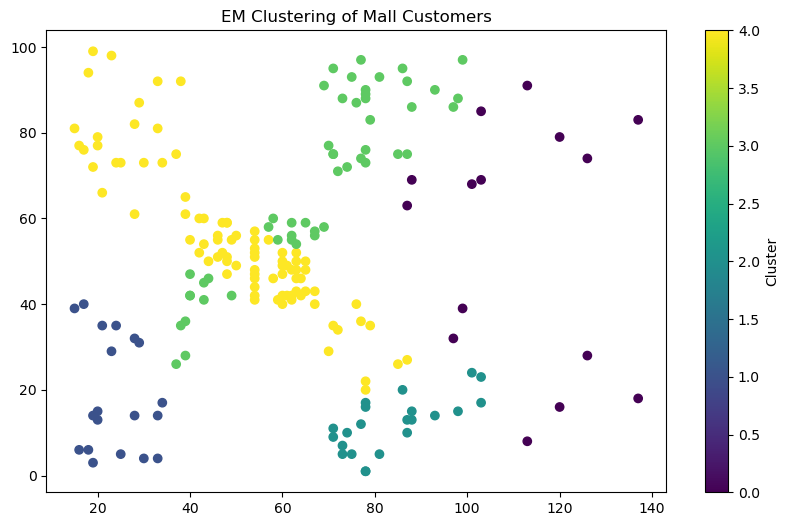

In [20]:
#first dataset
em1 = my_GaussianMixtureEM(n_components=5)
em1.fit(df1)

clusters_1 = em1.fit_predict(df1.values)
df1['Cluster'] = clusters_1

# Visualize the results for first dataset
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], c=df1['Cluster'])
plt.title('EM Clustering of Mall Customers')
plt.colorbar(scatter, label='Cluster')


plt.show()

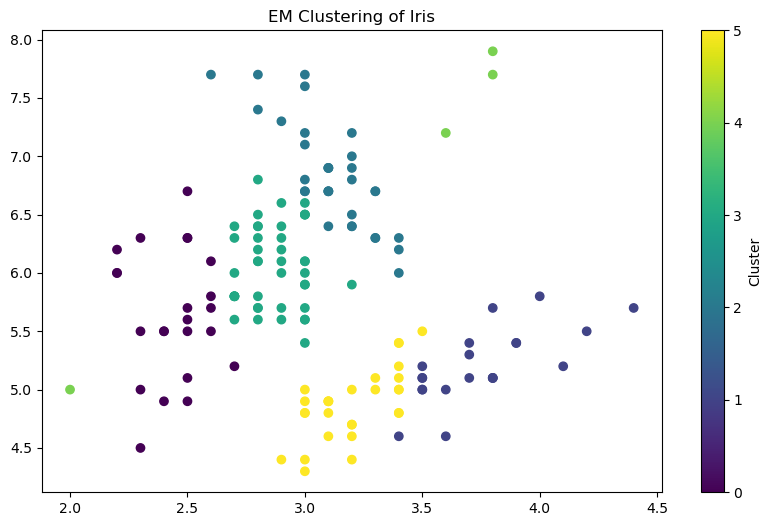

In [21]:
#second dataset
em2 = my_GaussianMixtureEM(n_components=6)
em2.fit(df2)

clusters_2 = em2.fit_predict(df2.values)
df2['Cluster'] = clusters_2

# Visualize the results for first dataset
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df2['sepal_width'], df2['sepal_length'], c=df2['Cluster'])
plt.title('EM Clustering of Iris')
plt.colorbar(scatter, label='Cluster')


plt.show()

## DBSCAN

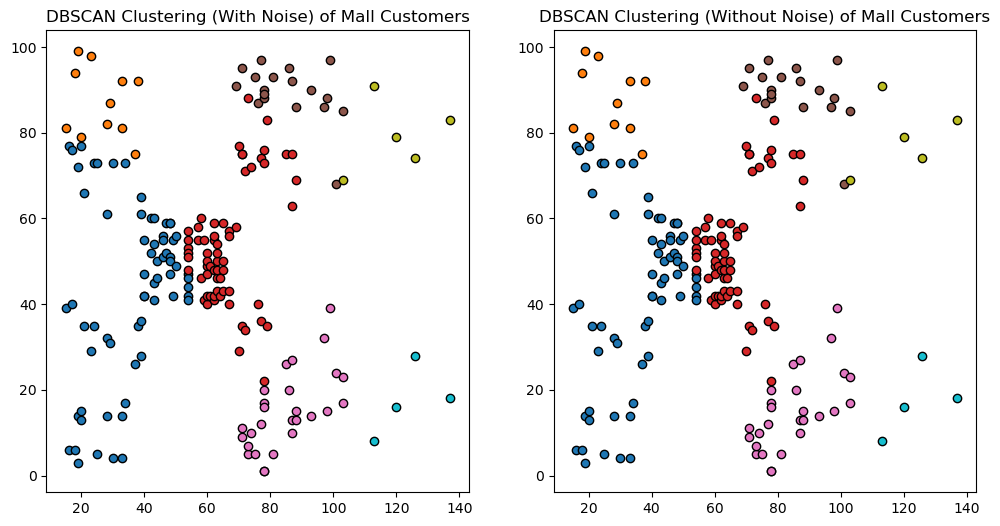

In [22]:
#first dataset
# Parameters
eps = 40 # Radius within which neighbors are considered
min_samples = 20  # Minimum number of points to form a dense region

# Apply DBSCAN
dbscan = my_dbscan(eps=eps, min_samples=min_samples)
labels1 = dbscan.fit_predict(df1)

# Plot the clusters
dbscan.plot_clusters(df1,'Mall Customers')

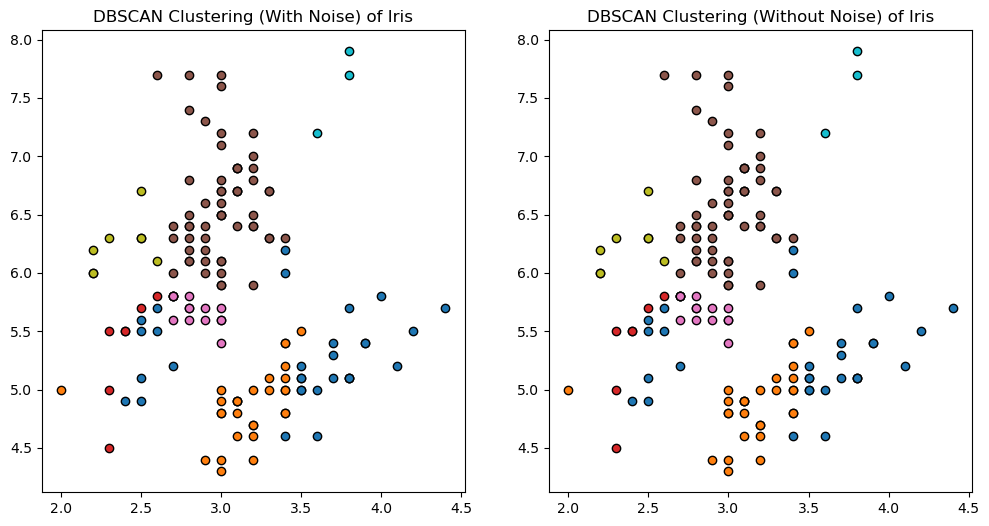

In [23]:
#second dataset
# Parameters
eps = 1.5 # Radius within which neighbors are considered
min_samples = 10  # Minimum number of points to form a dense region

# Apply DBSCAN
dbscan = my_dbscan(eps=eps, min_samples=min_samples)
labels2 = dbscan.fit_predict(df2)

# Plot the clusters
dbscan.plot_clusters(df2,'Iris')

## Metrics

In [24]:
#calculating distances for each algorithm

#average intera cluster distance dataset 1
a_intra_c_d_GMM = metrics.mean_intracluster_distance(metrics,x=df1,labels=clusters_1)
a_intra_c_d_DBSCAN = metrics.mean_intracluster_distance(metrics,df1,labels1)
a_intra_c_d_hierar = metrics.mean_intracluster_distance(metrics,df1,h_labels_df1)

#average intera cluster distance dataset 2
a_intra_c_d_GMM_df2 = metrics.mean_intracluster_distance(metrics,df2,clusters_2)
a_intra_c_d_DBSCAN_df2 = metrics.mean_intracluster_distance(metrics,df2,labels2)
a_intra_c_d_hierar_df2 = metrics.mean_intracluster_distance(metrics,df2,h_labels_df2)

#average inter cluster distances dataset 1
a_inter_c_d_GMM = metrics.mean_intercluster_distance(metrics,df1,clusters_1)
a_inter_c_d_DBSCAN = metrics.mean_intercluster_distance(metrics,df1,labels1)
a_inter_c_d_hierar = metrics.mean_intercluster_distance(metrics,df1,h_labels_df1)

#average inter cluster distances dataset 2
a_inter_c_d_GMM_df2 = metrics.mean_intercluster_distance(metrics,df2,clusters_2)
a_inter_c_d_DBSCAN_df2 = metrics.mean_intercluster_distance(metrics,df2,labels2)
a_inter_c_d_hierar_df2 = metrics.mean_intercluster_distance(metrics,df2,h_labels_df2)

#clustering speed dataset 1
clustering_speed_GMM = metrics.measure_em_clustering_speed(df1, n_components=5, max_iter= 100)
clustering_speed_DBSCAN = metrics.measure_DBSCAN_clustering_speed(df1,eps=40, min_samples=20)
clustering_speed_Hierar = metrics.measure_hierar_clustering_speed(df1,5)

#clustering speed dataset 2
clustering_speed_GMM_df2 = metrics.measure_em_clustering_speed(df2, n_components=9, max_iter= 100)
clustering_speed_DBSCAN_df2 = metrics.measure_DBSCAN_clustering_speed(df2,eps=1.5, min_samples=10)
clustering_speed_Hierar_df2 = metrics.measure_hierar_clustering_speed(df2,6)

In [25]:
#using reference algorithms 

#applying EM reference for dataset 1
em_ref_df = GaussianMixture(n_components=5, random_state=42)
em_ref_df.fit(df1)
em_labels_df = em_ref_df.fit_predict(df1)

#applying EM reference for dataset 2
em_ref_df2 = GaussianMixture(n_components=6, random_state=42)
em_ref_df2.fit(df2)
em_labels_df2 = em_ref_df2.fit_predict(df2)

#applying DBSCAN reference for dataset 1
db_ref_df = DBSCAN(eps=40,min_samples=20)
db_labels_df = db_ref_df.fit_predict(df1)

#applying DBSCAN reference for dataset 2
db_ref_df2 = DBSCAN(eps=1.5,min_samples=10)
db_labels_df2 = db_ref_df2.fit_predict(df2)

#applying Hierarchy reference for dataset 1
agg = AgglomerativeClustering(n_clusters=5,linkage='ward')
agg_labels_df = agg.fit_predict(df1)

#applying Hierarchy reference for dataset 2
agg = AgglomerativeClustering(n_clusters=6,linkage='ward')
agg_labels_df2 = agg.fit_predict(df2)

#average intra and inter cluster distance for reference EM algo on dataset 1
a_intra_c_d_RGMM_df =  metrics.mean_intracluster_distance(metrics,df1,em_labels_df)
a_inter_c_d_RGMM_df = metrics.mean_intercluster_distance(metrics,df1,em_labels_df)

#average intra and inter cluster distance for reference EM algo on dataset 2
a_intra_c_d_RGMM_df2 =  metrics.mean_intracluster_distance(metrics,df2,em_labels_df2)
a_inter_c_d_RGMM_df2 = metrics.mean_intracluster_distance(metrics,df2,em_labels_df2)

#average intra and inter cluster distance for reference DBSCAN algo on dataset 1
a_inter_c_d_RDBSCAN_df = metrics.mean_intracluster_distance(metrics,df1,db_labels_df)
a_intra_c_d_RDBSCAN_df = metrics.mean_intracluster_distance(metrics,df1,db_labels_df)

#average intra and inter cluster distance for reference DBSCAN algo on dataset 2
a_inter_c_d_RDBSCAN_df2 = metrics.mean_intracluster_distance(metrics,df2,db_labels_df2)
a_intra_c_d_RDBSCAN_df2 = metrics.mean_intracluster_distance(metrics,df2,db_labels_df2)

#average intra and inter cluster distance for reference Agglomerative clustering on dataset 1
a_inter_c_d_agglo_df = metrics.mean_intercluster_distance(metrics,df1,agg_labels_df)
a_intra_c_d_agglo_df = metrics.mean_intracluster_distance(metrics,df1,agg_labels_df)

#average intra and inter cluster distance for reference Agglomerative clustering on dataset 2
a_inter_c_d_agglo_df2 = metrics.mean_intercluster_distance(metrics,df2,agg_labels_df2)
a_intra_c_d_agglo_df2 = metrics.mean_intracluster_distance(metrics,df2,agg_labels_df2)

#measuring cluster speeds on dataset 1
clustering_speed_RGMM_df = metrics.measure_ref_em_clustering_speed(df1,n_components=5)
clustering_speed_RDBSCAN_df = metrics.measure_ref_DBSCAN_clustering_speed(df1,eps=40,min_samples=20)
clustering_speed_RHierar_df = metrics.measure_ref_Hierar_clustering_speed(df1,5)

#measuring cluster speeds on dataset 2
clustering_speed_RGMM_df2 = metrics.measure_ref_em_clustering_speed(df2,n_components=6)
clustering_speed_RDBSCAN_df2 = metrics.measure_ref_DBSCAN_clustering_speed(df2,eps=1.5,min_samples=10)
clustering_speed_RHierar_df2 = metrics.measure_ref_Hierar_clustering_speed(df2,6)

c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [26]:
#6. Comparisons on Student Performance Dataset

metrics = {
    'Metric': [
        'Average Inter-Cluster Distance (Agglomerative)',
        'Average Inter-Cluster Distance (EM)',
        'Average Inter-Cluster Distance (DBSCAN)',
        'Average Intra-Cluster Distance (Agglomerative)',
        'Average Intra-Cluster Distance (EM)',
        'Average Intra-Cluster Distance (DBSCAN)',
        'Clustering Speed (Agglomerative)',
        'Clustering Speed (EM)',
        'Clustering Speed (DBSCAN)'
    ],
    'Implemented Algorithms': [
        a_inter_c_d_hierar,
        a_inter_c_d_GMM,
        a_inter_c_d_DBSCAN,
        a_intra_c_d_hierar,
        a_intra_c_d_GMM,
        a_intra_c_d_DBSCAN,
        clustering_speed_Hierar,
        clustering_speed_GMM,
        clustering_speed_DBSCAN
    ],
    'Library Algorithm': [
        a_inter_c_d_agglo_df,
        a_inter_c_d_RGMM_df,
        a_inter_c_d_RDBSCAN_df,
        a_intra_c_d_agglo_df,
        a_intra_c_d_RGMM_df,
        a_intra_c_d_RDBSCAN_df,
        clustering_speed_RHierar_df,
        clustering_speed_RGMM_df,
        clustering_speed_RDBSCAN_df
    ]
}

print('Mall Customers')
comparison_table = pd.DataFrame(metrics)
comparison_table

Mall Customers


,Metric,Implemented Algorithms,Library Algorithm
0,Average Inter-Cluster Distance (Agglomerative),56.145836,57.496240
1,Average Inter-Cluster Distance (EM),53.640901,53.640901
2,Average Inter-Cluster Distance (DBSCAN),53.668599,46.091641
3,Average Intra-Cluster Distance (Agglomerative),17.413636,19.756912
4,Average Intra-Cluster Distance (EM),28.358630,28.358630
5,Average Intra-Cluster Distance (DBSCAN),23.407162,46.091641
6,Clustering Speed (Agglomerative),0.091588,0.003546
7,Clustering Speed (EM),0.103967,0.093742
8,Clustering Speed (DBSCAN),0.001534,0.023332


In [27]:
#Comparisons on Iris Dataset

metrics_df2 = {
    'Metric': [
        'Average Inter-Cluster Distance (Agglomerative)',
        'Average Inter-Cluster Distance (EM)',
        'Average Inter-Cluster Distance (DBSCAN)',
        'Average Intra-Cluster Distance (Agglomerative)',
        'Average Intra-Cluster Distance (EM)',
        'Average Intra-Cluster Distance (DBSCAN)',
        'Clustering Speed (Agglomerative)',
        'Clustering Speed (EM)',
        'Clustering Speed (DBSCAN)'
    ],
    'Implemented Algorithms': [
        a_inter_c_d_hierar_df2,
        a_inter_c_d_GMM_df2,
        a_inter_c_d_DBSCAN_df2,
        a_intra_c_d_hierar_df2,
        a_intra_c_d_GMM_df2,
        a_intra_c_d_DBSCAN_df2,
        clustering_speed_Hierar_df2,
        clustering_speed_GMM_df2,
        clustering_speed_DBSCAN_df2
    ],
    'Library Algorithm': [
        a_inter_c_d_agglo_df2,
        a_inter_c_d_RGMM_df2,
        a_inter_c_d_RDBSCAN_df2,
        a_intra_c_d_agglo_df2,
        a_intra_c_d_RGMM_df2,
        a_intra_c_d_RDBSCAN_df2,
        clustering_speed_RHierar_df2,
        clustering_speed_RGMM_df2,
        clustering_speed_RDBSCAN_df2
    ]
}

print('Iris Dataset')
comparison_table_df2 = pd.DataFrame(metrics_df2)
comparison_table_df2

Iris Dataset


,Metric,Implemented Algorithms,Library Algorithm
0,Average Inter-Cluster Distance (Agglomerative),2.500110,2.745475
1,Average Inter-Cluster Distance (EM),2.740543,0.586880
2,Average Inter-Cluster Distance (DBSCAN),2.757433,2.300989
3,Average Intra-Cluster Distance (Agglomerative),1.462248,0.530974
4,Average Intra-Cluster Distance (EM),0.511860,0.586880
5,Average Intra-Cluster Distance (DBSCAN),0.813546,2.300989
6,Clustering Speed (Agglomerative),0.040753,0.010765
7,Clustering Speed (EM),0.286408,0.151743
8,Clustering Speed (DBSCAN),0.000641,0.013844


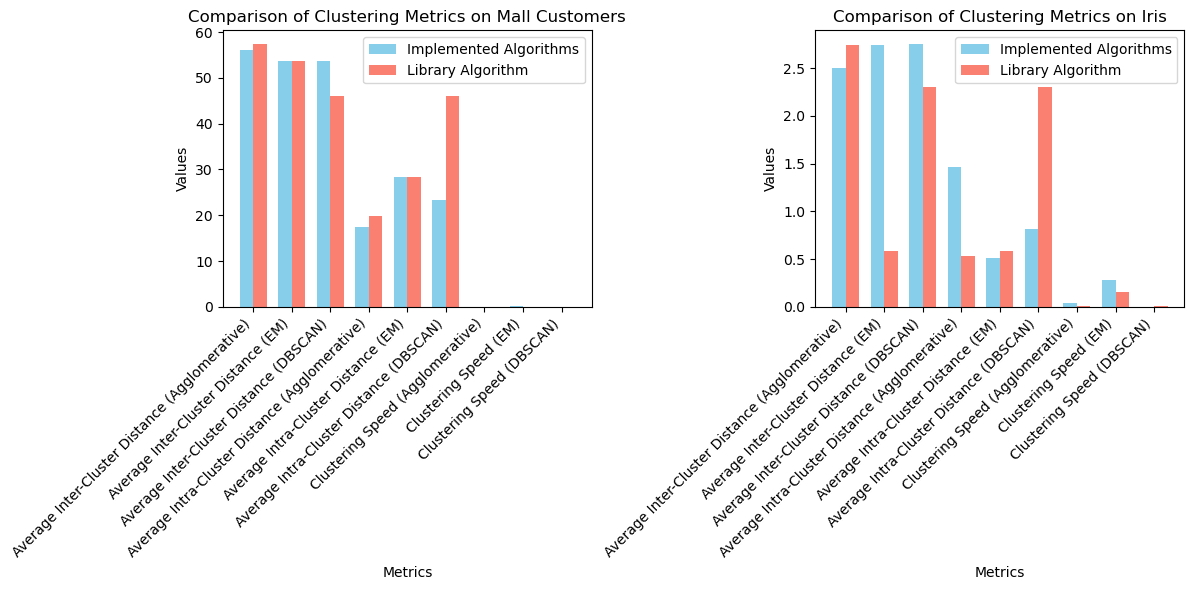

In [28]:
# Plotting comparisons
bar_width = 0.35

comparison_table.set_index('Metric', inplace=True)
x = np.arange(len(comparison_table.index))

comparison_table_df2.set_index('Metric', inplace=True)
x_df = np.arange(len(comparison_table_df2.index))


# Create subplots with 1 row and 2 columns (side by side)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1 (left)
# Create bar plots
ax[0].bar(x - bar_width/2, comparison_table['Implemented Algorithms'], width=bar_width, label='Implemented Algorithms', color='skyblue')
ax[0].bar(x + bar_width/2, comparison_table['Library Algorithm'], width=bar_width, label='Library Algorithm', color='salmon')

# Adding labels and title
ax[0].set_xlabel('Metrics')
ax[0].set_ylabel('Values')
ax[0].set_title('Comparison of Clustering Metrics on Mall Customers')
ax[0].set_xticks(x, comparison_table.index, rotation=45, ha='right')
ax[0].legend()

ax[1].bar(x_df - bar_width/2, comparison_table_df2['Implemented Algorithms'], width=bar_width, label='Implemented Algorithms', color='skyblue')
ax[1].bar(x_df + bar_width/2, comparison_table_df2['Library Algorithm'], width=bar_width, label='Library Algorithm', color='salmon')

# Adding labels and title
ax[1].set_xlabel('Metrics')
ax[1].set_ylabel('Values')
ax[1].set_title('Comparison of Clustering Metrics on Iris')
ax[1].set_xticks(x, comparison_table_df2.index, rotation=45, ha='right')
ax[1].legend()




# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Average Inter-Cluster Distance: Lower values indicate better separation between clusters.
Conclusion: Implemented hierarchical clustering performs better on both datasets. EM clustering performs almost the same as the library implementation on the first dataset but on the second dataset the library implementation performs a little bit better. My DBSCAN implementation outperforms the library version on the first dataset but performs poorly in the second dataset.

Average Intra-Cluster Distance: Lower values indicate that points within the same cluster are closer together.
Conclusion: Both EM algorithms have almost the same average intra-cluster distance, indicating better compactness within clusters. However, the implemented DBSCAN algorithm has a much lower intra-cluster distance compared to the library version on both datasets. Both versions of the hierarchical clustering have more or less the same average intra-cluster distances.

Clustering Speed: Lower values indicate faster clustering.
Conclusion: Both implemented and library algorithms performed fast but the library algorithms are a little bit faster on almost all datasets.